# TPM034A Machine Learning for socio-technical systems 
## `Assignment 03: Understanding primary school performance`

**Delft University of Technology**<br>
**Q2 2022**<br>
**Instructor:** Sander van Cranenburgh <br>
**TAs:**  Francisco Garrido Valenzuela & Lucas Spierenburg <br>


## `Instructions`

**Assignments aim to:**<br>
* Examine your understanding of the key concepts and techniques.
* Examine your the applied ML skills.

**Assignments:**<br>
* Are graded and must be submitted (see the submission instruction below). 

# `Application: Primary school performance` <br>

### **Introduction**

In this lab session you will use ML to predict which primary schools perform well and which do not. The quality of primary school is deemed to impact the children's future employment outcomes, especially for students from lower-income families (see [reference](https://www.emerald.com/insight/content/doi/10.1016/S0147-9121(01)20039-9/full/html)). Therefore, **the ministry of education** expects all schools to meet certain performance criteria.<br>

**Measuring school performance** is notoriously difficult. In lab session 3, you have developed ML models to predict the share of students adviced to go to higher education (HAVO, VWO). However, it would be **naive** to equate such an indicator to school performance. This would ignore self-selection effects. For instance, wealthier families tend to live together in wealthy neighbourhood. Moreover, wealthier families may be able to afford extra education (e.g. saturday morning math classes) which less well-off families are not able to. As a result, the share of students adviced to go to higher education may be higher in wealthier neigbourhoods not because of the better school, but because of opportunities to have extra education. School advices thus do not necessarily reflect the performance of schools. <br>

Nonetheless, it is evident that - all else being equal - a good performing school has a larger share of students leaving with advice for higher education than a bad performing school. In other words, based on behavioural intuition (and theory) we can expect school performance to impact on the share of school leaver with an advice for higher education. <br>

School performance is latent; we do not measure it directly. But, using the models developed in lab session 3 we can predict the **expected** share of school leavers with an advice for higher education. We can compare this expectation with the observed share. The difference between the two may, at least partially, be explained by the school performance. In other words, if the expected share is much higher than the observed share, the school might not perform well. The figure below shows this conceptual model.<br>
![conceptual_model](data/conceptual_model.jpg)<br>


Despite the limited direct data on school performance, the ministry of education would like to get your advice on the following two points:

1. The ministry of education has the capacity to do full-fledged assessments of just 10 schools. Can you provide a list of 10 schools to assess with priority?
1. Schools receive extra funding for each student with a non-native Dutch language, so-called NOAT2 students. The extra funding should enable schools to allocate more resources to the teaching NOAT2 students, while not leaving other students (called NOAT1) worse off. In other words, the extra funding should mitigate the impact from NOAT2 students on the share of school leavers with an advice for higher education. The ministry would like to know whether the current funding is sufficient to achieve this goal. 


#### **Data**
For this assignment you have access to two data sets:
* The school advice data set of lab session 3 [link](data/school_data.csv). Similar as in lab session 3 the buurt features are expressed as shares of the buurt population (for example, the number of women in the buurt [count] is converted into the share of women in the buurt [%]).
* NOAT data [link](data/NOAT.csv) <br>. This data provide the number of pupils that are Dutch native speakers (NOAT1_STUDENTS), and the number of pupils that are non native Dutch speakers (NOAT2_STUDENTS).

### **Tasks and grading**

1.  **Load, merge, and clean data** [1 pnt]
    1. Load the school data and the NOAT data.
    1. Compute the share of NOAT1 students and the share of NOAT2 students in each school.
    1. Merge the computed shares of NOAT1 and NOAT2 students in the school data. (Note that the NOAT data does not exist for some school in the school data, do **NOT** drop observations for these schools, and replace nan values by 0.).
1. **Prepare the data** [1 pnt]
    1. Encode categorical variables ('DENOMINATION' and 'SPECIES_PO').
    1. Select the 30 most relevant variables for prediction. (hint: use those features that most strongly correlate with the target: SHARE_HIGH).
    1. Scale the data using sklearn's StandardScaler.
    1. Split the data into a train and a test set.
1. **Train multiple models to predict the share of students adviced to go to higher education** [4 pnt]
    1. Random forest: print the performance of the random forest, visualise the importance of each feature on a barplot.
    1. MLP: perform the hyperparameter tuning, print the performance of the MLP
    1. Gradient boosting: print the performance of the gradient boosting regression
    1. Ensemble model: Create 3 ensemble models from the 3 models (print the performance of each ensemble model):
    - ensemble model 1: Random Forest, MLP
    - ensemble model 2: Random Forest, GBR
    - ensemble model 3: MLP, GBR
1. **Substantive results** [3 pnt]
    1. Predict the expected share of school leaver with an advice for higher eduction using the model with the best generalisation performance. 
    1. Compute the difference between the expected SHARE_HIGH and the actual SHARE_HIGH. Which 10 schools would you recommend the ministry of education to assess in-depth with priority?
    1. Reflect on the meaningfulness and limitations of your analysis.
1. **Extra funding for NOAT2 students** [1 pnt]
    1. Explain why the question of the ministry regarding the adequacy of the current funding for NOAT2 **cannot** be answered using ML (or at least not the ML taught in this course), and the provided data. <br>


<br>

### `Learning objective`
This assignment provides less structure (i.e. concrete descriptions of tasks we expect you to do) than the previous ones. This is deliberate. By this time, you have more experience. The learning objective is that you are able to reasonably independently apply ML in the context of a socio-technical environment. 


### **Submission**
- The deadline for this assignment is **Wed, 07 December 2022** 
- Use **Python 3.7 or above**
- You have to submit your work in zip file with the ipynb **(fully executed)** in Brightspace

### `Workspace set-up`
**Option 1: Google Colab**<br>
Uncomment the following cells code lines if you are running this notebook on Colab

In [ ]:
#!git clone https://github.com/TPM34A/Q2_2022
#!pip install -r Q2_2022/requirements_colab.txt
#!mv "/content/Q2_2022/Assignments/assignment_03/data" /content/data

**Option 2: Local environment**<br>
Uncomment the following cell if you are running this notebook on your local environment. This will install all dependencies on your Python version.

In [ ]:
#!pip install -r requirements.txt

In [1]:
# Import required Python packages and modules
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from os import getcwd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer,log_loss
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Setting
pd.set_option('display.max_columns', None)

### **1. Load, merge, and clean data**
#### 1.1 **Load** the school and the NOAT data.

In [2]:
# Load datasets 

#load csv files
school_df    = pd.read_csv('data/school_data.csv')
noat_df      = pd.read_csv('data/NOAT.csv')

Inspect the dataframes 

In [3]:
school_df.head()

,SCHOOL_ID,POLL_DATE_PUPILS,POLL_DATE_ADVISORIES,BRIN_NUMBER,ESTABLISHMENT_NUMBER,INSTITUTION_NAME_BRANCH,ZIPCODE_ESTABLISHMENT,LOCALITY_NAME,MUNICIPAL_NUMBER,MUNICIPAL_NAME,PROVINCE,AUTHORIZED_AUTHORITY_NUMBER,SPECIES_PO,DENOMINATION,ADVICE_NOT_POSSIBLE,TOTAL_ADVICE,Buurt2020,Wijk2020,Buurtnaam2020,Wijknaam2020,number_inhabitants_5,BirthRelative_25,MortalityRelative_27,Population_Density_33,DegreeOfUrbanity_115,Environmental_Address_Density_116,Men_6,Women_7,k_0To15Years_8,k_15To25Years_9,k_25To45Years_10,k_45To65Years_11,k_65YearsOrder_12,Single_13,Married_14,Divorced_15,Widowed_16,WesternTotal_17,Non-WesternTotal_18,Morocco_19,DutchAntillesAndAruba_20,Suriname_21,Turkey_22,OtherNon-Western_23,HouseholdsTotal_28,Single_Households_29,HouseholdsWithoutChildren_30,HouseholdsWithChildren_31,AverageHouseholdSize_32,Housing_Stock_34,AverageWOZValueOfHomes_35,PercentageFamilyHome_36,PercentageFamilyHome_37,PercentageOccupied_38,PercentUnoccupied_39,Homes_for_Sale_40,Rental_HousingTotal_41,InBezitResidential_42,InPossessionOtherLandlords_43,OwnershipUnknown_44,YearOfConstructionBefore2000_45,YearOfConstructionFrom2000_46,pctEducationLevelLow,pctEducationLevelHigh,PassengerCarTotal_99,PassengerCarSPerHousehold_102,PassengerCarSBySurface_103,Motorcycles_104,DistanceToHousehold_105,DistanceToGreatSupermarket_106,DistanceToNursery_107,DistanceToSchool_108,SchoolsWithin3Km_109,geometry,ADVICE_GIVEN,SHARE_HIGH,TOTAL_STUDENTS,TOTAL_POP,%WesternTotal_17,%Non-WesternTotal_18,%Morocco_19,%DutchAntillesAndAruba_20,%Suriname_21,%Turkey_22,%OtherNon-Western_23
0,00AP-0,20201001,20210729,00AP,0,Wereldwijs,2716PH,ZOETERMEER,637,Zoetermeer,Zuid-Holland,41646,Bo,Gereformeerd vrijgemaakt,0,20,6370100.0,63701.0,Meerzicht-West,Meerzicht,15410.0,10.0,9.0,6738.0,1.0,2977.0,0.481506,0.518494,0.175535,0.114536,0.245944,0.246918,0.217391,0.493835,0.339714,0.118105,0.048670,0.118105,0.267034,0.022713,0.032446,0.066840,0.011681,0.133030,0.471123,0.184296,0.118754,0.168397,2.1,0.472680,194.0,37.0,63.0,98.0,2.0,45.0,55.0,50.0,5.0,0.0,98.0,2.0,0.320789,0.233871,0.393900,0.8,2654.0,0.026606,1.0,0.9,0.5,0.6,12.4,"POLYGON ((92150.00039999932 453177.4882999994,...",20,0.650000,103.0,10045.0,0.181185,0.409657,0.034843,0.049776,0.102539,0.017919,0.204082
1,00AR-0,20201001,20210729,00AR,0,"BS ""De Maasparel""",6107AW,STEVENSWEERT,1641,Maasgouw,Limburg,41797,Bo,Rooms-Katholiek,0,23,16410200.0,164102.0,Stevensweert waaronder Bilt,Wijk 02 Stevensweert,1650.0,8.0,9.0,335.0,5.0,234.0,0.506061,0.493939,0.130303,0.087879,0.212121,0.315152,0.248485,0.387879,0.475758,0.078788,0.057576,0.127273,0.012121,0.003030,0.003030,0.000000,0.000000,0.009091,0.451515,0.127273,0.184848,0.142424,2.2,0.437576,244.0,95.0,5.0,96.0,4.0,82.0,17.0,7.0,10.0,1.0,96.0,4.0,0.304688,0.289062,0.633333,1.4,213.0,0.063636,0.6,4.8,0.5,0.5,1.0,POLYGON ((187023.40619999915 349535.5938000008...,23,0.304348,150.0,255.0,0.823529,0.078431,0.019608,0.019608,0.000000,0.000000,0.058824
2,00AV-0,20201001,20210729,00AV,0,De Morgenster,3201CN,SPIJKENISSE,1930,Nissewaard,Zuid-Holland,41646,Bo,Gereformeerd vrijgemaakt,0,9,19300103.0,193001.0,Oranjebuurt,Centrum,5810.0,9.0,14.0,5935.0,1.0,2892.0,0.465577,0.535284,0.122203,0.093804,0.278830,0.256454,0.251291,0.473322,0.311532,0.126506,0.086919,0.101549,0.168675,0.008606,0.031842,0.040448,0.024096,0.064544,0.533563,0.270224,0.133391,0.129088,1.8,0.541824,169.0,34.0,66.0,97.0,3.0,37.0,63.0,55.0,8.0,0.0,78.0,22.0,0.377273,0.170455,0.428571,0.8,2545.0,0.031842,0.6,0.6,1.3,0.8,15.0,"POLYGON ((81873.86800000072 429841.6068000011,...",9,0.333333,73.0,2555.0,0.230920,0.383562,0.019569,0.072407,0.091977,0.054795,0.146771
3,00AZ-0,20201001,20210729,00AZ,0,De Stapsteen,2971AR,BLESKENSGRAAF CA,1978,Molenlanden,Zuid-Holland,41638,Bo,Openbaar,0,16,19780203.0,197802.0,Bleskensgraaf-Dorp,Wijk02-Bleskensgraaf ca,2870.0,8.0,12.0,235.0,5.0,287.0,0.503484,0.496516,0.217770,0.148084,0.207317,0.240418,0.188153,0.458188,0.440767,0.036585,0.060976,0.034843,0.034843,0.000000,0.003484,0.001742,0.0

In [4]:
noat_df.head()

,SCHOOL_ID,NOAT1_STUDENTS,NOAT2_STUDENTS
0,00AP-0,85,18.0
1,00AR-0,147,3.0
2,00AV-0,58,15.0
3,00AZ-0,78,13.0
4,00BB-0,74,1.0


In [5]:
print('Number of rows or schools',len(school_df. axes[0]))
print('Number of columns or features',len(school_df. axes[1]))

Number of rows or schools 6293
Number of columns or features 85


#### 1.2 Compute the share of NOAT1 students and the share of NOAT2 students in each school.

In [6]:
# Share of NOAT 1 students 
noat_df = noat_df.assign(Share_NOAT1 = lambda x: (x['NOAT1_STUDENTS'] /(x['NOAT1_STUDENTS']+x['NOAT2_STUDENTS'])))
# Share of NOAT 2 students 
noat_df = noat_df.assign(Share_NOAT2 = lambda x: (x['NOAT2_STUDENTS'] /(x['NOAT1_STUDENTS']+x['NOAT2_STUDENTS'])))
noat_df.head()

,SCHOOL_ID,NOAT1_STUDENTS,NOAT2_STUDENTS,Share_NOAT1,Share_NOAT2
0,00AP-0,85,18.0,0.825243,0.174757
1,00AR-0,147,3.0,0.980000,0.020000
2,00AV-0,58,15.0,0.794521,0.205479
3,00AZ-0,78,13.0,0.857143,0.142857
4,00BB-0,74,1.0,0.986667,0.013333


#### 1.3 Add the share of NOAT1 students and the share of NOAT2 students to the school data. (The NOAT data does not exist for some school in the school data, do **NOT** drop observations for these schools, and replace na values by 0.)

In [7]:
school_all_df = school_df.merge(noat_df[['SCHOOL_ID','Share_NOAT1','Share_NOAT2']],on ="SCHOOL_ID", how = 'left')
school_all_df.head()

,SCHOOL_ID,POLL_DATE_PUPILS,POLL_DATE_ADVISORIES,BRIN_NUMBER,ESTABLISHMENT_NUMBER,INSTITUTION_NAME_BRANCH,ZIPCODE_ESTABLISHMENT,LOCALITY_NAME,MUNICIPAL_NUMBER,MUNICIPAL_NAME,PROVINCE,AUTHORIZED_AUTHORITY_NUMBER,SPECIES_PO,DENOMINATION,ADVICE_NOT_POSSIBLE,TOTAL_ADVICE,Buurt2020,Wijk2020,Buurtnaam2020,Wijknaam2020,number_inhabitants_5,BirthRelative_25,MortalityRelative_27,Population_Density_33,DegreeOfUrbanity_115,Environmental_Address_Density_116,Men_6,Women_7,k_0To15Years_8,k_15To25Years_9,k_25To45Years_10,k_45To65Years_11,k_65YearsOrder_12,Single_13,Married_14,Divorced_15,Widowed_16,WesternTotal_17,Non-WesternTotal_18,Morocco_19,DutchAntillesAndAruba_20,Suriname_21,Turkey_22,OtherNon-Western_23,HouseholdsTotal_28,Single_Households_29,HouseholdsWithoutChildren_30,HouseholdsWithChildren_31,AverageHouseholdSize_32,Housing_Stock_34,AverageWOZValueOfHomes_35,PercentageFamilyHome_36,PercentageFamilyHome_37,PercentageOccupied_38,PercentUnoccupied_39,Homes_for_Sale_40,Rental_HousingTotal_41,InBezitResidential_42,InPossessionOtherLandlords_43,OwnershipUnknown_44,YearOfConstructionBefore2000_45,YearOfConstructionFrom2000_46,pctEducationLevelLow,pctEducationLevelHigh,PassengerCarTotal_99,PassengerCarSPerHousehold_102,PassengerCarSBySurface_103,Motorcycles_104,DistanceToHousehold_105,DistanceToGreatSupermarket_106,DistanceToNursery_107,DistanceToSchool_108,SchoolsWithin3Km_109,geometry,ADVICE_GIVEN,SHARE_HIGH,TOTAL_STUDENTS,TOTAL_POP,%WesternTotal_17,%Non-WesternTotal_18,%Morocco_19,%DutchAntillesAndAruba_20,%Suriname_21,%Turkey_22,%OtherNon-Western_23,Share_NOAT1,Share_NOAT2
0,00AP-0,20201001,20210729,00AP,0,Wereldwijs,2716PH,ZOETERMEER,637,Zoetermeer,Zuid-Holland,41646,Bo,Gereformeerd vrijgemaakt,0,20,6370100.0,63701.0,Meerzicht-West,Meerzicht,15410.0,10.0,9.0,6738.0,1.0,2977.0,0.481506,0.518494,0.175535,0.114536,0.245944,0.246918,0.217391,0.493835,0.339714,0.118105,0.048670,0.118105,0.267034,0.022713,0.032446,0.066840,0.011681,0.133030,0.471123,0.184296,0.118754,0.168397,2.1,0.472680,194.0,37.0,63.0,98.0,2.0,45.0,55.0,50.0,5.0,0.0,98.0,2.0,0.320789,0.233871,0.393900,0.8,2654.0,0.026606,1.0,0.9,0.5,0.6,12.4,"POLYGON ((92150.00039999932 453177.4882999994,...",20,0.650000,103.0,10045.0,0.181185,0.409657,0.034843,0.049776,0.102539,0.017919,0.204082,0.825243,0.174757
1,00AR-0,20201001,20210729,00AR,0,"BS ""De Maasparel""",6107AW,STEVENSWEERT,1641,Maasgouw,Limburg,41797,Bo,Rooms-Katholiek,0,23,16410200.0,164102.0,Stevensweert waaronder Bilt,Wijk 02 Stevensweert,1650.0,8.0,9.0,335.0,5.0,234.0,0.506061,0.493939,0.130303,0.087879,0.212121,0.315152,0.248485,0.387879,0.475758,0.078788,0.057576,0.127273,0.012121,0.003030,0.003030,0.000000,0.000000,0.009091,0.451515,0.127273,0.184848,0.142424,2.2,0.437576,244.0,95.0,5.0,96.0,4.0,82.0,17.0,7.0,10.0,1.0,96.0,4.0,0.304688,0.289062,0.633333,1.4,213.0,0.063636,0.6,4.8,0.5,0.5,1.0,POLYGON ((187023.40619999915 349535.5938000008...,23,0.304348,150.0,255.0,0.823529,0.078431,0.019608,0.019608,0.000000,0.000000,0.058824,0.980000,0.020000
2,00AV-0,20201001,20210729,00AV,0,De Morgenster,3201CN,SPIJKENISSE,1930,Nissewaard,Zuid-Holland,41646,Bo,Gereformeerd vrijgemaakt,0,9,19300103.0,193001.0,Oranjebuurt,Centrum,5810.0,9.0,14.0,5935.0,1.0,2892.0,0.465577,0.535284,0.122203,0.093804,0.278830,0.256454,0.251291,0.473322,0.311532,0.126506,0.086919,0.101549,0.168675,0.008606,0.031842,0.040448,0.024096,0.064544,0.533563,0.270224,0.133391,0.129088,1.8,0.541824,169.0,34.0,66.0,97.0,3.0,37.0,63.0,55.0,8.0,0.0,78.0,22.0,0.377273,0.170455,0.428571,0.8,2545.0,0.031842,0.6,0.6,1.3,0.8,15.0,"POLYGON ((81873.86800000072 429841.6068000011,...",9,0.333333,73.0,2555.0,0.230920,0.383562,0.019569,0.072407,0.091977,0.054795,0.146771,0.794521,0.205479
3,00AZ-0,20201001,20210729,00AZ,0,De Stapsteen,2971AR,BLESKENSGRAAF CA,1978,Molenlanden,Zuid-Holland,41638,Bo,Openbaar,0,16,19780203.0,197802.0,Bleskensgraaf-Dorp,Wijk02-Bleskensgraaf ca,2870.0,8.0,12.0,235.0,5.0,287.0,0.503484,0.496516,0.217770,0.148084,0.207317,0.240418,0.188153,0.4581

In [8]:
# Inspect whether there is missing data 
school_all_df.isnull().sum().nlargest(5)

Share_NOAT1             972
Share_NOAT2             972
SCHOOL_ID                 0
POLL_DATE_PUPILS          0
POLL_DATE_ADVISORIES      0
dtype: int64

In [9]:
# Replace the nan values with 0 
school_all_df.Share_NOAT1 = school_all_df.Share_NOAT1.replace(float('nan'), float(0))
school_all_df.Share_NOAT2 = school_all_df.Share_NOAT2.replace(float('nan'), float(0))

In [10]:
# Check wheter the data is changed correctly 
school_all_df.isnull().sum().nlargest(5)

SCHOOL_ID               0
POLL_DATE_PUPILS        0
POLL_DATE_ADVISORIES    0
BRIN_NUMBER             0
ESTABLISHMENT_NUMBER    0
dtype: int64

After closer inspection it turnes out there are some schools with a total number of students of 0. This should not be possible, but is left outside of the scope of this assignment for now after consultation with the TA's. The assumption is made that the percentage of schools with a population of 0 is so small it won't make too much of a difference in the analysis. 

In [11]:
print( 'Number of schools with a population of 0 is:',len(school_all_df.loc[(school_all_df.TOTAL_STUDENTS ==  0)]))
percentage_zeropop = len(school_all_df.loc[(school_all_df.TOTAL_STUDENTS ==  0)])/len(school_df. axes[0])*100
print( 'Percentage of schools with a population of 0 is:',percentage_zeropop)


Number of schools with a population of 0 is: 265
Percentage of schools with a population of 0 is: 4.211028126489751


### **2. Prepare the data**
#### 2.1 Encode categorical features ('DENOMINATION' and 'SPECIES_PO').

In [12]:
# Make dummies of the cateforical features 
df_school_nocat = pd.get_dummies(school_all_df, columns = ['DENOMINATION','SPECIES_PO'])
# Look at the columns present in the data 
df_school_nocat.keys() 

Index(['SCHOOL_ID', 'POLL_DATE_PUPILS', 'POLL_DATE_ADVISORIES', 'BRIN_NUMBER',
       'ESTABLISHMENT_NUMBER', 'INSTITUTION_NAME_BRANCH',
       'ZIPCODE_ESTABLISHMENT', 'LOCALITY_NAME', 'MUNICIPAL_NUMBER',
       'MUNICIPAL_NAME', 'PROVINCE', 'AUTHORIZED_AUTHORITY_NUMBER',
       'ADVICE_NOT_POSSIBLE', 'TOTAL_ADVICE', 'Buurt2020', 'Wijk2020',
       'Buurtnaam2020', 'Wijknaam2020', 'number_inhabitants_5',
       'BirthRelative_25', 'MortalityRelative_27', 'Population_Density_33',
       'DegreeOfUrbanity_115', 'Environmental_Address_Density_116', 'Men_6',
       'Women_7', 'k_0To15Years_8', 'k_15To25Years_9', 'k_25To45Years_10',
       'k_45To65Years_11', 'k_65YearsOrder_12', 'Single_13', 'Married_14',
       'Divorced_15', 'Widowed_16', 'WesternTotal_17', 'Non-WesternTotal_18',
       'Morocco_19', 'DutchAntillesAndAruba_20', 'Suriname_21', 'Turkey_22',
       'OtherNon-Western_23', 'HouseholdsTotal_28', 'Single_Households_29',
       'HouseholdsWithoutChildren_30', 'HouseholdsWithChi

#### 2.2 Select the 30 most relevant features for prediction. (hint: use the variables correlating the most with the target)

In [13]:
# Compute the correlation matrix
corr = df_school_nocat.corr()

# Compute absolute correlations with the target 
df_corr = corr[['SHARE_HIGH']].abs().sort_values(by=['SHARE_HIGH'],ascending=False).T

# Sort the features based the the strength of the correlation
features_corr_sorted  = list(df_corr.keys())

# Create list with the 30 most strongly correlated features start at the index 1 to exclude the target itself
features_corr = features_corr_sorted[1:31]
print(f'Features with the strongest correlation with the target:\n {features_corr}')

Features with the strongest correlation with the target:
 ['SPECIES_PO_Bo', 'SPECIES_PO_Sbo', 'pctEducationLevelHigh', 'pctEducationLevelLow', 'AverageWOZValueOfHomes_35', 'TOTAL_STUDENTS', 'Share_NOAT1', 'InBezitResidential_42', 'ADVICE_GIVEN', 'TOTAL_ADVICE', 'Turkey_22', 'Divorced_15', '%Turkey_22', '%Non-WesternTotal_18', '%WesternTotal_17', 'DutchAntillesAndAruba_20', 'Rental_HousingTotal_41', 'Homes_for_Sale_40', 'InPossessionOtherLandlords_43', 'Non-WesternTotal_18', 'PercentageOccupied_38', 'PercentUnoccupied_39', 'Share_NOAT2', 'WesternTotal_17', 'TOTAL_POP', 'Morocco_19', 'Women_7', 'Men_6', 'Suriname_21', 'BirthRelative_25']


Now we can create the train and test data sets, which we will use to train our ML models.

#### 2.3 Scale the data using sklearn's StandardScaler

In [14]:
# Create a df with the features only 
X = df_school_nocat[features_corr]

# Initiate scaler object & fit to data
scaler = StandardScaler()  
scaler.fit(X)  

# Create new dataframe X_scaled containg the scaled features 
X_scaled = scaler.transform(X)

#### 2.4 Split the sample into a train and a test sets.

In [15]:
# Target
Y = df_school_nocat.loc[:,'SHARE_HIGH']

# Split the data into a train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,random_state=12)

### **3. Training machine learning models**<br>

To compare different models, we provide you with a custom evaluation function that allows us to swiftly report the following stats for the train and test data:
* mean square error
* mean absolute error
* R2

In [16]:
def eval_regression_perf(model, X_train, X_test, Y_train, Y_test):
    
    # Make prediction with the trained model
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)

    # Create a function that computes the MSE, MAE, and R2
    def perfs(Y,Y_pred):
        mse = mean_squared_error(Y,Y_pred)
        mae = mean_absolute_error(Y,Y_pred)
        R2 = r2_score(Y,Y_pred)
        return mse,mae,R2

    # Apply the perfs function to the train and test data sets
    mse_train, mae_train, r2_train = perfs(Y_train,Y_pred_train)
    mse_test,  mae_test , r2_test  = perfs(Y_test,Y_pred_test)
        
    # Print results
    print('Performance')
    print(f'Mean Squared  Error Train | Test: \t{mse_train:>7.4f}\t|  {mse_test:>7.4f}')
    print(f'Mean Absolute Error Train | Test: \t{mae_train:>7.4f}\t|  {mae_test:>7.4f}')
    print(f'R2                  Train | Test: \t{ r2_train:>7.4f}\t|  {r2_test:>7.4f}\n')

#### 3.1 Random forest:
- Set the number of trees to 250
-  Use the following hyperparameters: 
    - max_depth = 9
    - max_features = 0.5
    - max_leaf_nodes = 30
    - min_samples_leaf = 50
- Print the performance of the random forest
- Visualise the importance of each feature on a barplot.

In [17]:
# Create RF object
n_trees = 250

# Set the hyperparameters of the Random Forest
max_depth        = 9
max_features     = 0.5
max_leaf_nodes   = 30
min_samples_leaf = 50

# Create the Random Forest object with the hyperparameters
rf = RandomForestRegressor(criterion = "squared_error", n_estimators=n_trees, max_features=max_features, 
                           max_depth=max_depth, max_leaf_nodes = max_leaf_nodes,min_samples_leaf=min_samples_leaf,
                           random_state=5)

# Train the Randon Forest
rf.fit(X_train,Y_train)

# Evaluate the performance of the hyperparameter optimised RF model
eval_regression_perf(rf,X_train,X_test, Y_train, Y_test)

Performance
Mean Squared  Error Train | Test: 	 0.0191	|   0.0205
Mean Absolute Error Train | Test: 	 0.1075	|   0.1110
R2                  Train | Test: 	 0.5362	|   0.5184



Top 5 most important features:
 ['TOTAL_STUDENTS', 'pctEducationLevelHigh', 'SPECIES_PO_Sbo', 'SPECIES_PO_Bo', 'pctEducationLevelLow', 'AverageWOZValueOfHomes_35']


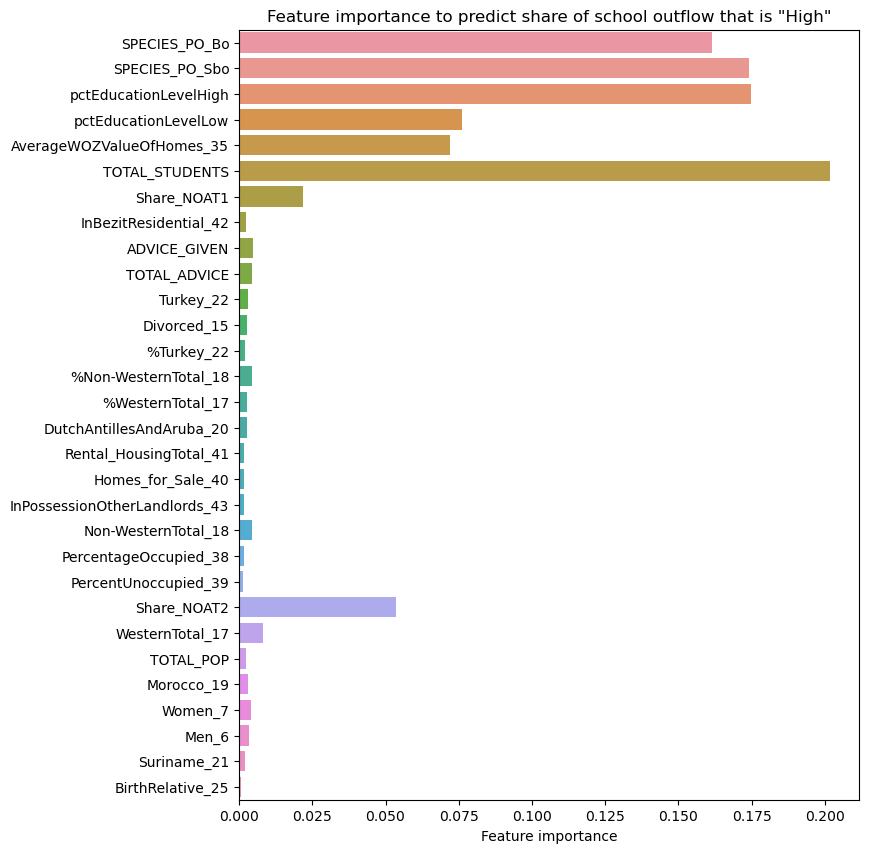

In [18]:
# Plot the feature importances
features = features_corr
fig, ax  = plt.subplots(figsize=(8,10))
sns.barplot(y=features_corr,x=rf.feature_importances_, ax = ax).set(title='Feature importance to predict share of school outflow that is "High"')
ax.set_xlabel('Feature importance')

# Print most important features
sorted_indices = np.argsort(rf.feature_importances_)[::-1]
most_imp_features_rf = [features[i] for i in sorted_indices]
print(f'Top 5 most important features:\n {most_imp_features_rf[:6]}')

# Show plot
plt.show()

#### 3.2 MLP
- Set the batch size to 250, and max_iter to 2000
- Perform a grid search on the following hyperparameters: 
    - hidden_layer_sizes, values: (20,20),(30,30),(25,25)
    - alpha, values: 5,1,0.1
    - learning_rate_init: 0.01,0.001,0.0001
- Perform the MLP regression with the tuned hyperparameters
- Print the performance of the MLP

In [19]:
# Create MLP object
mlp_gs = MLPRegressor(activation = 'tanh', solver='adam', batch_size=250, max_iter=2000)

# Define the hyperparameter search space
hyperparameter_space = {
    'hidden_layer_sizes': [(20,20),(30,30),(25,25)],
    'alpha': [5,1,0.1],
    'learning_rate_init': [0.01,0.001,0.0001]}

# Create scoring function
mse_scorer = make_scorer(mean_squared_error, greater_is_better = False)

# Create the grid_search object, with using the MLP classifier
folds = 5 # Number of cross validation splits
mlp_gridsearch = GridSearchCV(mlp_gs, hyperparameter_space, n_jobs=-1, cv=folds,scoring = mse_scorer)

In [20]:
mlp_gridsearch.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=MLPRegressor(activation='tanh', batch_size=250,
                                    max_iter=2000),
             n_jobs=-1,
             param_grid={'alpha': [5, 1, 0.1],
                         'hidden_layer_sizes': [(20, 20), (30, 30), (25, 25)],
                         'learning_rate_init': [0.01, 0.001, 0.0001]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [21]:
# Collect results into a new pandas dataframe 
df_gridsearch = pd.DataFrame.from_dict(mlp_gridsearch.cv_results_)
    
# Add new column with a label for the hyperparameter combinations  
df_gridsearch['gs_combinations'] = 'L2 = '+ df_gridsearch['param_alpha'].astype('str') + '; Learning_rate = '+ df_gridsearch['param_learning_rate_init'].astype('str') + '; Layers = ' + df_gridsearch['param_hidden_layer_sizes'].astype('str')
df_gridsearch = df_gridsearch.sort_values('rank_test_score')

print('Best hyperparameters found:\t', mlp_gridsearch.best_params_)
print('Best model performance:\t\t', -mlp_gridsearch.best_score_)

Best hyperparameters found:	 {'alpha': 0.1, 'hidden_layer_sizes': (30, 30), 'learning_rate_init': 0.001}
Best model performance:		 0.020501192143841142


In [22]:
# Create the optimized MLP model
mlp_optimize = MLPRegressor(hidden_layer_sizes= mlp_gridsearch.best_params_['hidden_layer_sizes'], activation = 'tanh', 
                            solver='adam', alpha = mlp_gridsearch.best_params_['alpha'] ,
                            batch_size=250,learning_rate_init = mlp_gridsearch.best_params_['learning_rate_init'], 
                            max_iter=2000)

# Train the MLP
mlp_optimize.fit(X_train,Y_train)

MLPRegressor(activation='tanh', alpha=0.1, batch_size=250,
             hidden_layer_sizes=(30, 30), max_iter=2000)

In [23]:
# Evaluate the performance of the MLP model
eval_regression_perf(mlp_optimize,X_train,X_test, Y_train, Y_test)

Performance
Mean Squared  Error Train | Test: 	 0.0198	|   0.0213
Mean Absolute Error Train | Test: 	 0.1092	|   0.1126
R2                  Train | Test: 	 0.5183	|   0.4983



#### 3.3 Gradient boosting
- Use the following hyperparameters:
    - max_depth = 6
    - max_features = 0.5
    - max_leaf_nodes = 30
    - min_samples_leaf = 50
    - learning_rate = 0.003
- Print the performance of the Gradient boosting regression

In [24]:
# Set the hyperparameters 
max_depth        = 6
max_features     = 0.5
max_leaf_nodes   = 30
min_samples_leaf = 50
learning_rate    = 0.003

# Peform the Gradient Boosting 
GBR = GradientBoostingRegressor(loss='squared_error', learning_rate=learning_rate, n_estimators=100, subsample=1.0, 
                           criterion='friedman_mse', min_samples_split=2, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=0.0, 
                           max_depth=max_depth, min_impurity_decrease=0.0, init=None, random_state=None, max_features=max_features, 
                           alpha=0.9, verbose=0, max_leaf_nodes=max_leaf_nodes, warm_start=False, validation_fraction=0.1, 
                           n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
# Fit ensemble objects
GBR.fit(X_train,Y_train)

GradientBoostingRegressor(learning_rate=0.003, max_depth=6, max_features=0.5,
                          max_leaf_nodes=30, min_samples_leaf=50)

In [25]:
# Evaluate the performance of the ensemble
eval_regression_perf(GBR,X_train, X_test,Y_train,Y_test)

Performance
Mean Squared  Error Train | Test: 	 0.0317	|   0.0329
Mean Absolute Error Train | Test: 	 0.1412	|   0.1445
R2                  Train | Test: 	 0.2288	|   0.2259



#### 3.4 Ensemble model
- Create 3 ensemble models from the 3 models with the tuned hyperparameters for each model
- model 1: Random forest, MLP
- model 2: Random forest, GBR
- model 3: MLP, GBR<br>

Print the performance of each ensemble model

In [26]:
# Model 1 Random Forest and MLP

# Create ensemble objects
er_1 = VotingRegressor([('rf', rf ), ('mlp', mlp_optimize)])

# Fit ensemble objects
er_1.fit(X_train,Y_train)

# Evaluate the performance of the ensemble
print('Results ensemble Model 1')
eval_regression_perf(er_1,X_train, X_test,Y_train,Y_test)

Results ensemble Model 1
Performance
Mean Squared  Error Train | Test: 	 0.0187	|   0.0203
Mean Absolute Error Train | Test: 	 0.1063	|   0.1099
R2                  Train | Test: 	 0.5444	|   0.5228



In [27]:
# Model 2 Random Forest and Gradient Boosting 

# Create ensemble objects
er_2 = VotingRegressor([('rf', rf ), ('gb', GBR)])

# Fit ensemble objects
er_2.fit(X_train,Y_train)

# Evaluate the performance of the ensemble
print('Results ensemble Model 2')
eval_regression_perf(er_2,X_train, X_test,Y_train,Y_test)

Results ensemble Model 2
Performance
Mean Squared  Error Train | Test: 	 0.0228	|   0.0240
Mean Absolute Error Train | Test: 	 0.1216	|   0.1248
R2                  Train | Test: 	 0.4452	|   0.4368



In [28]:
# Model 3 MLP and Gradient Boosting

# Create ensemble objects
er_3 = VotingRegressor([('mlp', mlp_optimize ), ('gb', GBR)])

# Fit ensemble objects
er_3.fit(X_train,Y_train)

# Evaluate the performance of the ensemble
print('Results ensemble Model 3')
eval_regression_perf(er_3,X_train, X_test,Y_train,Y_test)

Results ensemble Model 3
Performance
Mean Squared  Error Train | Test: 	 0.0225	|   0.0239
Mean Absolute Error Train | Test: 	 0.1207	|   0.1243
R2                  Train | Test: 	 0.4529	|   0.4387



### **4. Substantive results**

#### 4.1 Predict the expected share of school leaver with an advice for higher eduction using the model with the best generalisation performance.

In [29]:
# Evaluate the performance of the hyperparameter optimised RF model
print('Performance RF')
eval_regression_perf(rf,X_train,X_test, Y_train, Y_test)

# Evaluate the performance of the MLP model
print('Performance MLP')
eval_regression_perf(mlp_optimize,X_train,X_test, Y_train, Y_test)

# Evaluate the performance of the Gradient boosting
print('Performance Gradient Boosting')
eval_regression_perf(GBR,X_train, X_test,Y_train,Y_test)

# Evaluate the performance of the ensemble
print('Performance ensemble Model 1')
eval_regression_perf(er_1,X_train, X_test,Y_train,Y_test)

# Evaluate the performance of the ensemble
print('Performance ensemble Model 2')
eval_regression_perf(er_2,X_train, X_test,Y_train,Y_test)

# Evaluate the performance of the ensemble
print('Performance ensemble Model 3')
eval_regression_perf(er_3,X_train, X_test,Y_train,Y_test)

Performance RF
Performance
Mean Squared  Error Train | Test: 	 0.0191	|   0.0205
Mean Absolute Error Train | Test: 	 0.1075	|   0.1110
R2                  Train | Test: 	 0.5362	|   0.5184

Performance MLP
Performance
Mean Squared  Error Train | Test: 	 0.0198	|   0.0213
Mean Absolute Error Train | Test: 	 0.1092	|   0.1126
R2                  Train | Test: 	 0.5183	|   0.4983

Performance Gradient Boosting
Performance
Mean Squared  Error Train | Test: 	 0.0317	|   0.0329
Mean Absolute Error Train | Test: 	 0.1412	|   0.1445
R2                  Train | Test: 	 0.2288	|   0.2259

Performance ensemble Model 1
Performance
Mean Squared  Error Train | Test: 	 0.0187	|   0.0203
Mean Absolute Error Train | Test: 	 0.1063	|   0.1099
R2                  Train | Test: 	 0.5444	|   0.5228

Performance ensemble Model 2
Performance
Mean Squared  Error Train | Test: 	 0.0228	|   0.0240
Mean Absolute Error Train | Test: 	 0.1216	|   0.1248
R2                  Train | Test: 	 0.4452	|   0.4368

Perfor

From this anlysis, ensemble model 1 with the Random Forest and MLP was chosen as the best performing model. With different runs the performance of the models can change slightly. Solely the Random Forest performs quite well also. 

In [30]:
# Use ensemble model 1 to predict SHARE_HIGH
df_school_predict = df_school_nocat.assign(Predict_SHARE_HIGH = lambda x: er_1.predict(X_scaled))
df_school_predict.head()

,SCHOOL_ID,POLL_DATE_PUPILS,POLL_DATE_ADVISORIES,BRIN_NUMBER,ESTABLISHMENT_NUMBER,INSTITUTION_NAME_BRANCH,ZIPCODE_ESTABLISHMENT,LOCALITY_NAME,MUNICIPAL_NUMBER,MUNICIPAL_NAME,PROVINCE,AUTHORIZED_AUTHORITY_NUMBER,ADVICE_NOT_POSSIBLE,TOTAL_ADVICE,Buurt2020,Wijk2020,Buurtnaam2020,Wijknaam2020,number_inhabitants_5,BirthRelative_25,MortalityRelative_27,Population_Density_33,DegreeOfUrbanity_115,Environmental_Address_Density_116,Men_6,Women_7,k_0To15Years_8,k_15To25Years_9,k_25To45Years_10,k_45To65Years_11,k_65YearsOrder_12,Single_13,Married_14,Divorced_15,Widowed_16,WesternTotal_17,Non-WesternTotal_18,Morocco_19,DutchAntillesAndAruba_20,Suriname_21,Turkey_22,OtherNon-Western_23,HouseholdsTotal_28,Single_Households_29,HouseholdsWithoutChildren_30,HouseholdsWithChildren_31,AverageHouseholdSize_32,Housing_Stock_34,AverageWOZValueOfHomes_35,PercentageFamilyHome_36,PercentageFamilyHome_37,PercentageOccupied_38,PercentUnoccupied_39,Homes_for_Sale_40,Rental_HousingTotal_41,InBezitResidential_42,InPossessionOtherLandlords_43,OwnershipUnknown_44,YearOfConstructionBefore2000_45,YearOfConstructionFrom2000_46,pctEducationLevelLow,pctEducationLevelHigh,PassengerCarTotal_99,PassengerCarSPerHousehold_102,PassengerCarSBySurface_103,Motorcycles_104,DistanceToHousehold_105,DistanceToGreatSupermarket_106,DistanceToNursery_107,DistanceToSchool_108,SchoolsWithin3Km_109,geometry,ADVICE_GIVEN,SHARE_HIGH,TOTAL_STUDENTS,TOTAL_POP,%WesternTotal_17,%Non-WesternTotal_18,%Morocco_19,%DutchAntillesAndAruba_20,%Suriname_21,%Turkey_22,%OtherNon-Western_23,Share_NOAT1,Share_NOAT2,DENOMINATION_Algemeen bijzonder,DENOMINATION_Gereformeerd vrijgemaakt,DENOMINATION_Openbaar,DENOMINATION_Other,DENOMINATION_Protestants-Christelijk,DENOMINATION_Reformatorisch,DENOMINATION_Rooms-Katholiek,SPECIES_PO_Bo,SPECIES_PO_Sbo,Predict_SHARE_HIGH
0,00AP-0,20201001,20210729,00AP,0,Wereldwijs,2716PH,ZOETERMEER,637,Zoetermeer,Zuid-Holland,41646,0,20,6370100.0,63701.0,Meerzicht-West,Meerzicht,15410.0,10.0,9.0,6738.0,1.0,2977.0,0.481506,0.518494,0.175535,0.114536,0.245944,0.246918,0.217391,0.493835,0.339714,0.118105,0.048670,0.118105,0.267034,0.022713,0.032446,0.066840,0.011681,0.133030,0.471123,0.184296,0.118754,0.168397,2.1,0.472680,194.0,37.0,63.0,98.0,2.0,45.0,55.0,50.0,5.0,0.0,98.0,2.0,0.320789,0.233871,0.393900,0.8,2654.0,0.026606,1.0,0.9,0.5,0.6,12.4,"POLYGON ((92150.00039999932 453177.4882999994,...",20,0.650000,103.0,10045.0,0.181185,0.409657,0.034843,0.049776,0.102539,0.017919,0.204082,0.825243,0.174757,0,1,0,0,0,0,0,1,0,0.492855
1,00AR-0,20201001,20210729,00AR,0,"BS ""De Maasparel""",6107AW,STEVENSWEERT,1641,Maasgouw,Limburg,41797,0,23,16410200.0,164102.0,Stevensweert waaronder Bilt,Wijk 02 Stevensweert,1650.0,8.0,9.0,335.0,5.0,234.0,0.506061,0.493939,0.130303,0.087879,0.212121,0.315152,0.248485,0.387879,0.475758,0.078788,0.057576,0.127273,0.012121,0.003030,0.003030,0.000000,0.000000,0.009091,0.451515,0.127273,0.184848,0.142424,2.2,0.437576,244.0,95.0,5.0,96.0,4.0,82.0,17.0,7.0,10.0,1.0,96.0,4.0,0.304688,0.289062,0.633333,1.4,213.0,0.063636,0.6,4.8,0.5,0.5,1.0,POLYGON ((187023.40619999915 349535.5938000008...,23,0.304348,150.0,255.0,0.823529,0.078431,0.019608,0.019608,0.000000,0.000000,0.058824,0.980000,0.020000,0,0,0,0,0,0,1,1,0,0.563972
2,00AV-0,20201001,20210729,00AV,0,De Morgenster,3201CN,SPIJKENISSE,1930,Nissewaard,Zuid-Holland,41646,0,9,19300103.0,193001.0,Oranjebuurt,Centrum,5810.0,9.0,14.0,5935.0,1.0,2892.0,0.465577,0.535284,0.122203,0.093804,0.278830,0.256454,0.251291,0.473322,0.311532,0.126506,0.086919,0.101549,0.168675,0.008606,0.031842,0.040448,0.024096,0.064544,0.533563,0.270224,0.133391,0.129088,1.8,0.541824,169.0,34.0,66.0,97.0,3.0,37.0,63.0,55.0,8.0,0.0,78.0,22.0,0.377273,0.170455,0.428571,0.8,2545.0,0.031842,0.6,0.6,1.3,0.8,15.0,"POLYGON ((81873.86800000072 429841.6068000011,...",9,0.333333,73.0,2555.0,0.230920,0.383562,0.019569,0.072407,0.091977,0.054795,0.146771,0.794521,0.205479,0,1,0,0,0,0,0,1,0,0.433882
3,00AZ-0,20201001,20210729,00AZ,0,De Stapsteen,2971AR

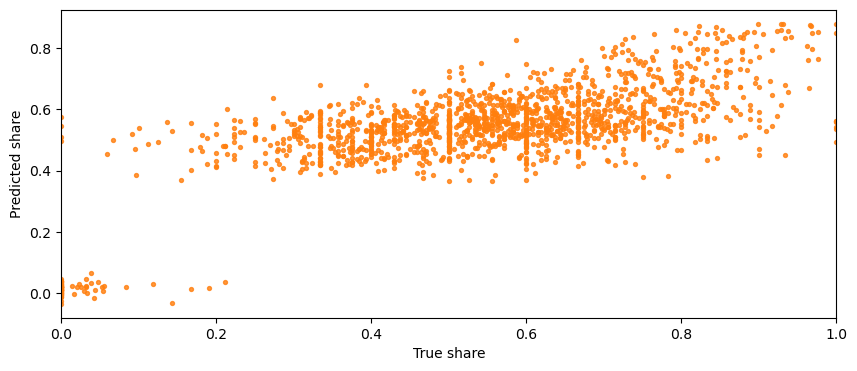

In [31]:
# Visualisation of the difference between the predicted value and the real share 
fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.scatter(x = Y_test, y = er_1.predict(X_test), s = 8, alpha = 0.8, c = '#ff7f0e')
ax.set_xlim(0,1)
ax.set_xlabel('True share')
ax.set_ylabel('Predicted share')

plt.show()

#### 4.2 Compute the difference between the expected SHARE_HIGH and the actual SHARE_HIGH. Which 10 schools would you recommend the ministry of education to assess in-depth with priority?

In [32]:
# Add the absolute difference of the predicted share with the real share to the dataframe
df_school_predict = df_school_predict.assign(DIFF_SHARE_HIGH_abs = lambda x: abs(x.SHARE_HIGH - x.Predict_SHARE_HIGH))
# Add the real difference of the predicted share with the real share to the dataframe
df_school_predict = df_school_predict.assign(DIFF_SHARE_HIGH_real = lambda x: x.SHARE_HIGH - x.Predict_SHARE_HIGH)

In [33]:
# The 10 schools with the biggest absolute difference between the real share and the prediction
df_school_predict.nlargest(10,'DIFF_SHARE_HIGH_abs')

,SCHOOL_ID,POLL_DATE_PUPILS,POLL_DATE_ADVISORIES,BRIN_NUMBER,ESTABLISHMENT_NUMBER,INSTITUTION_NAME_BRANCH,ZIPCODE_ESTABLISHMENT,LOCALITY_NAME,MUNICIPAL_NUMBER,MUNICIPAL_NAME,PROVINCE,AUTHORIZED_AUTHORITY_NUMBER,ADVICE_NOT_POSSIBLE,TOTAL_ADVICE,Buurt2020,Wijk2020,Buurtnaam2020,Wijknaam2020,number_inhabitants_5,BirthRelative_25,MortalityRelative_27,Population_Density_33,DegreeOfUrbanity_115,Environmental_Address_Density_116,Men_6,Women_7,k_0To15Years_8,k_15To25Years_9,k_25To45Years_10,k_45To65Years_11,k_65YearsOrder_12,Single_13,Married_14,Divorced_15,Widowed_16,WesternTotal_17,Non-WesternTotal_18,Morocco_19,DutchAntillesAndAruba_20,Suriname_21,Turkey_22,OtherNon-Western_23,HouseholdsTotal_28,Single_Households_29,HouseholdsWithoutChildren_30,HouseholdsWithChildren_31,AverageHouseholdSize_32,Housing_Stock_34,AverageWOZValueOfHomes_35,PercentageFamilyHome_36,PercentageFamilyHome_37,PercentageOccupied_38,PercentUnoccupied_39,Homes_for_Sale_40,Rental_HousingTotal_41,InBezitResidential_42,InPossessionOtherLandlords_43,OwnershipUnknown_44,YearOfConstructionBefore2000_45,YearOfConstructionFrom2000_46,pctEducationLevelLow,pctEducationLevelHigh,PassengerCarTotal_99,PassengerCarSPerHousehold_102,PassengerCarSBySurface_103,Motorcycles_104,DistanceToHousehold_105,DistanceToGreatSupermarket_106,DistanceToNursery_107,DistanceToSchool_108,SchoolsWithin3Km_109,geometry,ADVICE_GIVEN,SHARE_HIGH,TOTAL_STUDENTS,TOTAL_POP,%WesternTotal_17,%Non-WesternTotal_18,%Morocco_19,%DutchAntillesAndAruba_20,%Suriname_21,%Turkey_22,%OtherNon-Western_23,Share_NOAT1,Share_NOAT2,DENOMINATION_Algemeen bijzonder,DENOMINATION_Gereformeerd vrijgemaakt,DENOMINATION_Openbaar,DENOMINATION_Other,DENOMINATION_Protestants-Christelijk,DENOMINATION_Reformatorisch,DENOMINATION_Rooms-Katholiek,SPECIES_PO_Bo,SPECIES_PO_Sbo,Predict_SHARE_HIGH,DIFF_SHARE_HIGH_abs,DIFF_SHARE_HIGH_real
4237,15KW-0,20201001,20210729,15KW,0,De Klaeter,8394VL,DE HOEVE,98,Weststellingwerf,Friesland,41631,0,7,980901.0,9809.0,De Hoeve,De Hoeve-Vinkega,605.0,8.0,8.0,48.0,5.0,30.0,0.520661,0.479339,0.148760,0.107438,0.181818,0.371901,0.181818,0.404959,0.504132,0.049587,0.033058,0.049587,0.008264,0.000000,0.000000,0.000000,0.000000,0.008264,0.388430,0.074380,0.157025,0.148760,2.6,0.390083,327.0,100.0,0.0,95.0,5.0,89.0,11.0,6.0,5.0,0.0,93.0,7.0,0.166667,0.354167,0.677686,1.7,32.0,0.074380,4.0,3.9,3.4,1.3,1.2,POLYGON ((202046.05600000173 544845.0659999996...,7,0.000000,33.0,40.0,0.750000,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000,0.969697,0.030303,0,0,1,0,0,0,0,1,0,0.573996,0.573996,-0.573996
4835,17RD-0,20201001,20210729,17RD,0,OBS Rietendak,7335DC,APELDOORN,200,Apeldoorn,Gelderland,41616,0,15,2000304.0,20003.0,Westenenk,Zuidwest,15040.0,9.0,10.0,2002.0,2.0,1558.0,0.500665,0.499335,0.150266,0.106051,0.216090,0.297540,0.229388,0.420878,0.454787,0.071476,0.052194,0.069814,0.084109,0.003657,0.004322,0.003657,0.017952,0.053856,0.432513,0.135306,0.152261,0.144614,2.2,0.429189,282.0,82.0,18.0,97.0,3.0,70.0,30.0,22.0,7.0,0.0,88.0,12.0,0.275109,0.292576,0.523936,1.2,1049.0,0.052194,0.9,0.7,0.5,0.5,14.1,POLYGON ((194112.21680000052 468107.4670000002...,15,0.000000,127.0,3570.0,0.294118,0.354342,0.015406,0.018207,0.015406,0.075630,0.226891,0.874016,0.125984,0,0,1,0,0,0,0,1,0,0.573575,0.573575,-0.573575
2655,10CJ-0,20201001,20210729,10CJ,0,De Ontdekking,8072GZ,NUNSPEET,302,Nunspeet,Gelderland,41345,0,5,3020000.0,30200.0,Nunspeet-Oost,Wijk 00 Nunspeet,22470.0,12.0,13.0,386.0,4.0,909.0,0.493102,0.506676,0.176457,0.121273,0.224522,0.266355,0.211838,0.414775,0.468847,0.061638,0.054295,0.040498,0.041611,0.003338,0.001335,0.002003,0.002893,0.032265,0.404094,0.119938,0.130174,0.153538,2.4,0.403605,287.0,82.0,18.0,97.0,3.0,63.0,36.0,27.0,9.0,1.0,82.0,18.0,0.331707,0.226220,0.501780,1.2,194.0,0.041166,1.2,1.1,0.8,0.7,7.2,POLYGON ((183078.79679999873 489546.0001000017...,5,0.000000,67.0,2785.0,0.326750,0.335727,0.026930,0.010772,0.016158,0.023339,0.260323,0.895522,0.104478,0,0,1,0,0,0,0,1,0,0.546667,0.546667,-0.546667


In [34]:
# The five schools with the largest difference between actual high share above the predicted high share 
# Here the prediction is lower than the real share 
df_school_predict.nlargest(5,'DIFF_SHARE_HIGH_real') 

,SCHOOL_ID,POLL_DATE_PUPILS,POLL_DATE_ADVISORIES,BRIN_NUMBER,ESTABLISHMENT_NUMBER,INSTITUTION_NAME_BRANCH,ZIPCODE_ESTABLISHMENT,LOCALITY_NAME,MUNICIPAL_NUMBER,MUNICIPAL_NAME,PROVINCE,AUTHORIZED_AUTHORITY_NUMBER,ADVICE_NOT_POSSIBLE,TOTAL_ADVICE,Buurt2020,Wijk2020,Buurtnaam2020,Wijknaam2020,number_inhabitants_5,BirthRelative_25,MortalityRelative_27,Population_Density_33,DegreeOfUrbanity_115,Environmental_Address_Density_116,Men_6,Women_7,k_0To15Years_8,k_15To25Years_9,k_25To45Years_10,k_45To65Years_11,k_65YearsOrder_12,Single_13,Married_14,Divorced_15,Widowed_16,WesternTotal_17,Non-WesternTotal_18,Morocco_19,DutchAntillesAndAruba_20,Suriname_21,Turkey_22,OtherNon-Western_23,HouseholdsTotal_28,Single_Households_29,HouseholdsWithoutChildren_30,HouseholdsWithChildren_31,AverageHouseholdSize_32,Housing_Stock_34,AverageWOZValueOfHomes_35,PercentageFamilyHome_36,PercentageFamilyHome_37,PercentageOccupied_38,PercentUnoccupied_39,Homes_for_Sale_40,Rental_HousingTotal_41,InBezitResidential_42,InPossessionOtherLandlords_43,OwnershipUnknown_44,YearOfConstructionBefore2000_45,YearOfConstructionFrom2000_46,pctEducationLevelLow,pctEducationLevelHigh,PassengerCarTotal_99,PassengerCarSPerHousehold_102,PassengerCarSBySurface_103,Motorcycles_104,DistanceToHousehold_105,DistanceToGreatSupermarket_106,DistanceToNursery_107,DistanceToSchool_108,SchoolsWithin3Km_109,geometry,ADVICE_GIVEN,SHARE_HIGH,TOTAL_STUDENTS,TOTAL_POP,%WesternTotal_17,%Non-WesternTotal_18,%Morocco_19,%DutchAntillesAndAruba_20,%Suriname_21,%Turkey_22,%OtherNon-Western_23,Share_NOAT1,Share_NOAT2,DENOMINATION_Algemeen bijzonder,DENOMINATION_Gereformeerd vrijgemaakt,DENOMINATION_Openbaar,DENOMINATION_Other,DENOMINATION_Protestants-Christelijk,DENOMINATION_Reformatorisch,DENOMINATION_Rooms-Katholiek,SPECIES_PO_Bo,SPECIES_PO_Sbo,Predict_SHARE_HIGH,DIFF_SHARE_HIGH_abs,DIFF_SHARE_HIGH_real
1125,05ZH-0,20201001,20210729,05ZH,0,Basissch De Berkenhorst,7951JS,STAPHORST,180,Staphorst,Overijssel,41629,0,11,1800005.0,18000.0,Staphorst-Zuid,Wijk 00 Staphorst (kern),8745.0,16.0,9.0,1289.0,4.0,555.0,0.505432,0.494568,0.225272,0.152659,0.228130,0.237278,0.155517,0.467696,0.456261,0.027444,0.048027,0.026301,0.028016,0.000000,0.000000,0.001715,0.000572,0.024585,0.350486,0.090909,0.092624,0.166381,2.8,0.360206,255.0,85.0,15.0,96.0,4.0,73.0,27.0,16.0,11.0,0.0,83.0,17.0,0.376414,0.126010,0.520297,1.5,671.0,0.050886,1.5,0.9,0.6,0.6,5.9,POLYGON ((210974.59369999915 517927.8126000017...,11,1.000000,58.0,710.0,0.323944,0.345070,0.000000,0.000000,0.021127,0.007042,0.302817,0.706897,0.293103,0,0,1,0,0,0,0,1,0,0.472546,0.527454,0.527454
1105,05XH-0,20201001,20210729,05XH,0,Basisschool De Tarissing,8843KE,SPANNUM,1949,Waadhoeke,Friesland,42604,0,5,19494701.0,194947.0,Spannum,Spannum,275.0,4.0,7.0,82.0,5.0,39.0,0.490909,0.509091,0.181818,0.145455,0.181818,0.327273,0.200000,0.454545,0.418182,0.054545,0.036364,0.054545,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.418182,0.127273,0.127273,0.163636,2.4,0.418182,208.0,99.0,1.0,96.0,4.0,83.0,15.0,10.0,5.0,2.0,98.0,2.0,0.300000,0.200000,0.563636,1.4,48.0,0.090909,2.4,2.7,0.3,0.3,1.9,POLYGON ((169830.38199999928 573147.2369999997...,5,1.000000,28.0,20.0,0.750000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,1,0,0.474938,0.525062,0.525062
1766,07OL-0,20201001,20210729,07OL,0,Rotterdamse Schoolver 11,3076RK,ROTTERDAM,599,Rotterdam,Zuid-Holland,46723,0,18,5991284.0,59912.0,Lombardijen,IJsselmonde,61360.0,12.0,13.0,5206.0,1.0,2554.0,0.485495,0.514505,0.177885,0.117992,0.279254,0.251222,0.173729,0.530150,0.310055,0.106095,0.053781,0.107236,0.428781,0.048892,0.066819,0.105769,0.072849,0.134371,0.472621,0.205916,0.104221,0.162565,2.1,0.467438,170.0,36.0,64.0,96.0,4.0,39.0,61.0,48.0,13.0,0.0,91.0,9.0,0.376021,0.185251,0.355525,0.8,1851.0,0.021349,0.6,0.7,0.4,0.5,16.3,"POLYGON ((95697.23200000077 433483.0489999987,...",18,1.000000,187.0,59195.0,0.111158,0.444463,0.050680,0.069263,0.109638,0.075513,0.139285,0.994652,0.005348,1,

In [35]:
# The five schools with the largest difference between actual high share below the predicted high share 
# Here the prediction is higher than the real share 
df_school_predict.nsmallest(5,'DIFF_SHARE_HIGH_real')

,SCHOOL_ID,POLL_DATE_PUPILS,POLL_DATE_ADVISORIES,BRIN_NUMBER,ESTABLISHMENT_NUMBER,INSTITUTION_NAME_BRANCH,ZIPCODE_ESTABLISHMENT,LOCALITY_NAME,MUNICIPAL_NUMBER,MUNICIPAL_NAME,PROVINCE,AUTHORIZED_AUTHORITY_NUMBER,ADVICE_NOT_POSSIBLE,TOTAL_ADVICE,Buurt2020,Wijk2020,Buurtnaam2020,Wijknaam2020,number_inhabitants_5,BirthRelative_25,MortalityRelative_27,Population_Density_33,DegreeOfUrbanity_115,Environmental_Address_Density_116,Men_6,Women_7,k_0To15Years_8,k_15To25Years_9,k_25To45Years_10,k_45To65Years_11,k_65YearsOrder_12,Single_13,Married_14,Divorced_15,Widowed_16,WesternTotal_17,Non-WesternTotal_18,Morocco_19,DutchAntillesAndAruba_20,Suriname_21,Turkey_22,OtherNon-Western_23,HouseholdsTotal_28,Single_Households_29,HouseholdsWithoutChildren_30,HouseholdsWithChildren_31,AverageHouseholdSize_32,Housing_Stock_34,AverageWOZValueOfHomes_35,PercentageFamilyHome_36,PercentageFamilyHome_37,PercentageOccupied_38,PercentUnoccupied_39,Homes_for_Sale_40,Rental_HousingTotal_41,InBezitResidential_42,InPossessionOtherLandlords_43,OwnershipUnknown_44,YearOfConstructionBefore2000_45,YearOfConstructionFrom2000_46,pctEducationLevelLow,pctEducationLevelHigh,PassengerCarTotal_99,PassengerCarSPerHousehold_102,PassengerCarSBySurface_103,Motorcycles_104,DistanceToHousehold_105,DistanceToGreatSupermarket_106,DistanceToNursery_107,DistanceToSchool_108,SchoolsWithin3Km_109,geometry,ADVICE_GIVEN,SHARE_HIGH,TOTAL_STUDENTS,TOTAL_POP,%WesternTotal_17,%Non-WesternTotal_18,%Morocco_19,%DutchAntillesAndAruba_20,%Suriname_21,%Turkey_22,%OtherNon-Western_23,Share_NOAT1,Share_NOAT2,DENOMINATION_Algemeen bijzonder,DENOMINATION_Gereformeerd vrijgemaakt,DENOMINATION_Openbaar,DENOMINATION_Other,DENOMINATION_Protestants-Christelijk,DENOMINATION_Reformatorisch,DENOMINATION_Rooms-Katholiek,SPECIES_PO_Bo,SPECIES_PO_Sbo,Predict_SHARE_HIGH,DIFF_SHARE_HIGH_abs,DIFF_SHARE_HIGH_real
4237,15KW-0,20201001,20210729,15KW,0,De Klaeter,8394VL,DE HOEVE,98,Weststellingwerf,Friesland,41631,0,7,980901.0,9809.0,De Hoeve,De Hoeve-Vinkega,605.0,8.0,8.0,48.0,5.0,30.0,0.520661,0.479339,0.148760,0.107438,0.181818,0.371901,0.181818,0.404959,0.504132,0.049587,0.033058,0.049587,0.008264,0.000000,0.000000,0.000000,0.000000,0.008264,0.388430,0.074380,0.157025,0.148760,2.6,0.390083,327.0,100.0,0.0,95.0,5.0,89.0,11.0,6.0,5.0,0.0,93.0,7.0,0.166667,0.354167,0.677686,1.7,32.0,0.074380,4.0,3.9,3.4,1.3,1.2,POLYGON ((202046.05600000173 544845.0659999996...,7,0.0,33.0,40.0,0.750000,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000,0.969697,0.030303,0,0,1,0,0,0,0,1,0,0.573996,0.573996,-0.573996
4835,17RD-0,20201001,20210729,17RD,0,OBS Rietendak,7335DC,APELDOORN,200,Apeldoorn,Gelderland,41616,0,15,2000304.0,20003.0,Westenenk,Zuidwest,15040.0,9.0,10.0,2002.0,2.0,1558.0,0.500665,0.499335,0.150266,0.106051,0.216090,0.297540,0.229388,0.420878,0.454787,0.071476,0.052194,0.069814,0.084109,0.003657,0.004322,0.003657,0.017952,0.053856,0.432513,0.135306,0.152261,0.144614,2.2,0.429189,282.0,82.0,18.0,97.0,3.0,70.0,30.0,22.0,7.0,0.0,88.0,12.0,0.275109,0.292576,0.523936,1.2,1049.0,0.052194,0.9,0.7,0.5,0.5,14.1,POLYGON ((194112.21680000052 468107.4670000002...,15,0.0,127.0,3570.0,0.294118,0.354342,0.015406,0.018207,0.015406,0.075630,0.226891,0.874016,0.125984,0,0,1,0,0,0,0,1,0,0.573575,0.573575,-0.573575
2655,10CJ-0,20201001,20210729,10CJ,0,De Ontdekking,8072GZ,NUNSPEET,302,Nunspeet,Gelderland,41345,0,5,3020000.0,30200.0,Nunspeet-Oost,Wijk 00 Nunspeet,22470.0,12.0,13.0,386.0,4.0,909.0,0.493102,0.506676,0.176457,0.121273,0.224522,0.266355,0.211838,0.414775,0.468847,0.061638,0.054295,0.040498,0.041611,0.003338,0.001335,0.002003,0.002893,0.032265,0.404094,0.119938,0.130174,0.153538,2.4,0.403605,287.0,82.0,18.0,97.0,3.0,63.0,36.0,27.0,9.0,1.0,82.0,18.0,0.331707,0.226220,0.501780,1.2,194.0,0.041166,1.2,1.1,0.8,0.7,7.2,POLYGON ((183078.79679999873 489546.0001000017...,5,0.0,67.0,2785.0,0.326750,0.335727,0.026930,0.010772,0.016158,0.023339,0.260323,0.895522,0.104478,0,0,1,0,0,0,0,1,0,0.546667,0.546667,-0.546667
545,04LB-0,2020

#### Which 10 schools would you recommend the ministry of education to assess in-depth with priority?
The ten schools that are chosen are the schools with a large difference between the real share and the actual share. A distinction is made between whether the prediction is lower or higher than the actual share. The 5 schools which have the largest difference between a high real share but a lower prediction are selected, and 5 schools which have a low real share but a high prediction. For these schools, factors that are outside of the data could play a role in the difference between the prediction and the real share. Predictions much higher could have different reasons than predictions much lower. Due to this, a distinction is made between the two catergories.\

Schools with the biggest difference between prediction and real share where there is a higher prediction than the acutal share are: 
- Basissch De Berkenhorst
- Basisschool De Tarissing
- Rotterdamse Schoolver 11
- Basisschool Het Kompas
- CNS Basissch Zomerland

For the schools with a higher real share the wealth of the parents could play a role, providing kids with out of school education.

Schools with the biggest difference between prediction and real share where there is a higher prediction than the acutal share are: 
- De Klaeter
- OBS Rietendak
- De Ontdekking
- Gravin v Rechterenschool
- Basissch De Pannebakker

The difference could be explained as stated in the introduction: "if the expected share is much higher than the observed share, the school might not perform well". The reason for this is difficult to determine without more knowledge about the system.

#### 4.3 Reflect on the meaningfulness and limitations of your analysis

Looking at the errors from the model performance, the analysis made doesn't perform very well. Taking the best perfoming model still results in significant mistakes. School performance deviates from the prediction a lot. As seen in the section above, for several schools the difference between the prediction and the real share are large. This shows the model is not always good in predicting the share of students with a high advice. As in the Figure below, it can be seen that the model predicts well for schools with an average SHARE_HIGH, around 50%, but much poorer for schools with either a high or a low SHARE_HIGH. 

As mentioned in the introduction "Measuring school performance is notoriously difficult". The conclusion could be drawn that both for poor and well performing schools, the features in the data aren't the right predictors. 


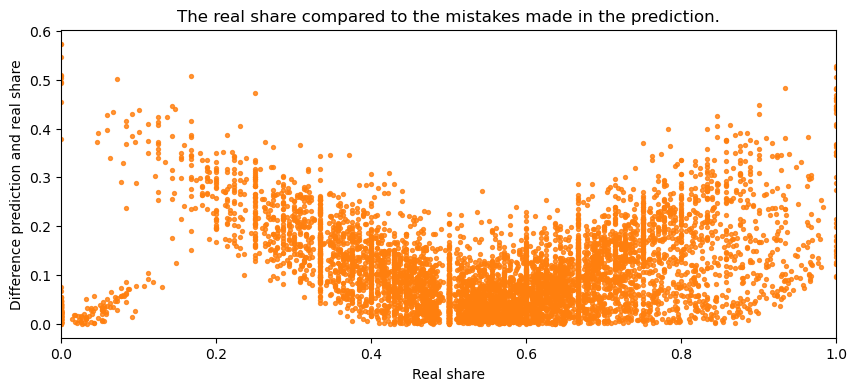

In [36]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.scatter(x = df_school_predict.SHARE_HIGH, y = df_school_predict.DIFF_SHARE_HIGH_abs, s = 8, alpha = 0.8, c = '#ff7f0e')
ax.set_xlim(0,1)
ax.set_ylabel('Difference prediction and real share')
ax.set_xlabel('Real share')
ax.set_title('The real share compared to the mistakes made in the prediction.')

plt.show()

The limitations of the model are that features which are important to the share high are not present in the data, making it impossible to accurately predict the effect of the chosen features. The assumption of ceterus paribus doesn't apply, limiting the model to unsufficient features. Furthermore, the causality of the data cannot be guarenteed, making the predictions less insightfull.\ 

Also, the assumption is made that the schools with zero population don't alter the model. Whether this assumption is true should be explored further in additional research.

### 5  **Extra funding for NOAT2 students**

#### 5.1 Explain why the question of the ministry regarding the adequacy of the current funding for NOAT2 **cannot** be answered using ML (or at least not the ML taught in this course), and the provided data. <br>

ML is not suitable for predicting new situations or interventions. An intervention can be seen as an out-of-distribution feature. As the question of increasing funding relates to such an intervention, ML cannot accurately predict what will happen in case funding will be in- or decreased.\
Furthermore, causality is a problem. The data doesn't adhere to the conditions *Temporal Precedence* and *Nonspuriousness*. This makes it impossible to accuratly predict what a change in funding will do. *Temporal Precedence* isn't present, as it is not clear whether a school becomming better comes before a higher share of high advice, or after. It's possible a higher share influences the other features. Furthermore, it is not clear whether the relationship between a high quality school and a high share is due to a third factor such as parents with a high income. This is a *spuriousness* of the data. Without causality it is still possible to use a model for predicting the impact of policy interventions, but only if one is willing to assume causal relationship. As this is notoriously difficult, making this assumption doesn't seem suitable. 

Data Generating Processes (DGP) could be sliding as well, making ML even less suitable. This is however not clear from the assignment or data, so this is not further explored
